<a href="https://colab.research.google.com/github/sainath6304796986/Machine-Learning-Assignments/blob/sai/Assignment_final_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Necessary Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [3]:
df=pd.read_csv('/content/drive/MyDrive/datasets for ml/insurance1.csv')

Preprocessing
And EDA

In [4]:
df.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [10]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Histplot

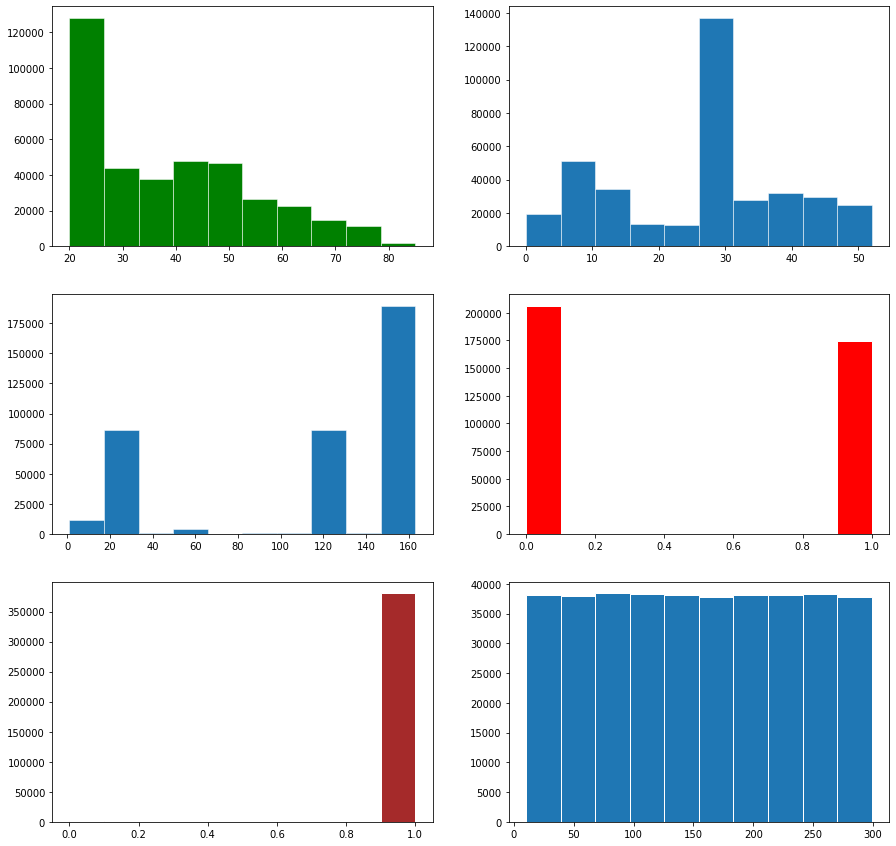

In [5]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
ax[0,0].hist(df['Age'],linewidth=0.5,edgecolor='white',color='green')
ax[0,1].hist(df['Region_Code'],linewidth=0.5,edgecolor='white')
ax[1,0].hist(df['Policy_Sales_Channel'],linewidth=0.5,edgecolor='white')
ax[1,1].hist(df['Previously_Insured'],edgecolor='white',color='red')
ax[2,0].hist(df['Driving_License'],edgecolor='white',color='brown')
ax[2,1].hist(df['Vintage'],edgecolor='white')
plt.show()

Countplot

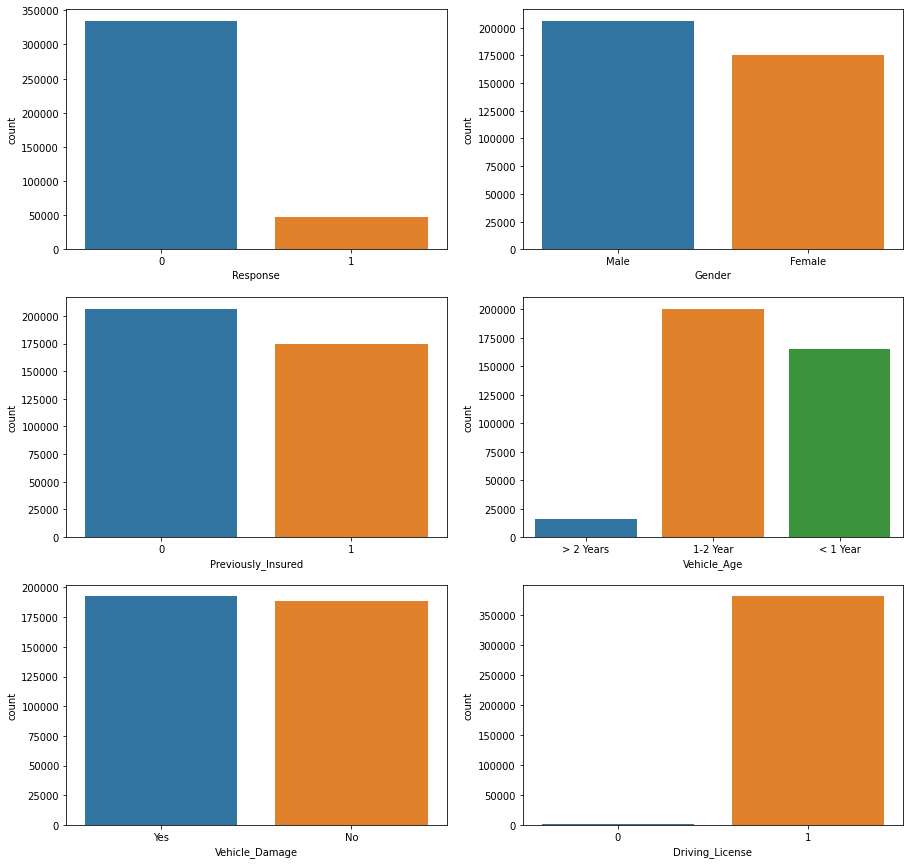

In [6]:
fig,ax=plt.subplots(3,2,figsize=(15,15))
sns.countplot(ax=ax[0,0],x=df['Response'])
sns.countplot(ax=ax[0,1],x=df['Gender'])
sns.countplot(ax=ax[1,0],x=df['Previously_Insured'])
sns.countplot(ax=ax[1,1],x=df['Vehicle_Age'])
sns.countplot(ax=ax[2,0],x=df['Vehicle_Damage'])
sns.countplot(ax=ax[2,1],x=df['Driving_License'])



Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

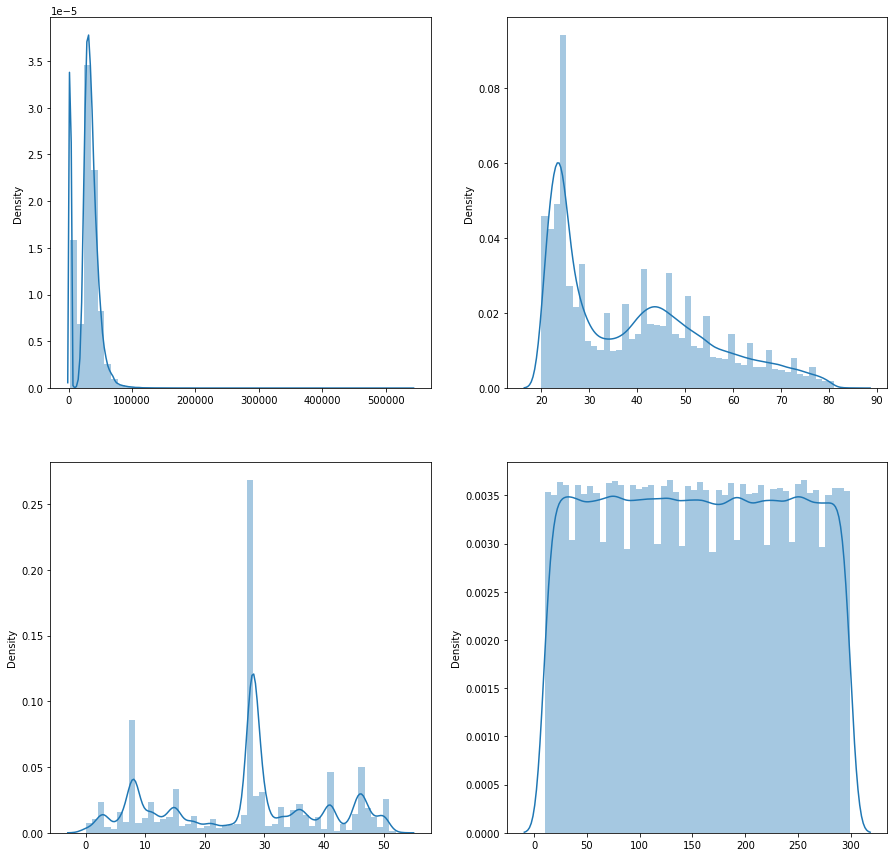

In [7]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.distplot(ax=ax[0,0],x=df['Annual_Premium'])
sns.distplot(ax=ax[0,1],x=df['Age'])
sns.distplot(ax=ax[1,0],x=df['Region_Code'])
sns.distplot(ax=ax[1,1],x=df['Vintage'])


Boxplot

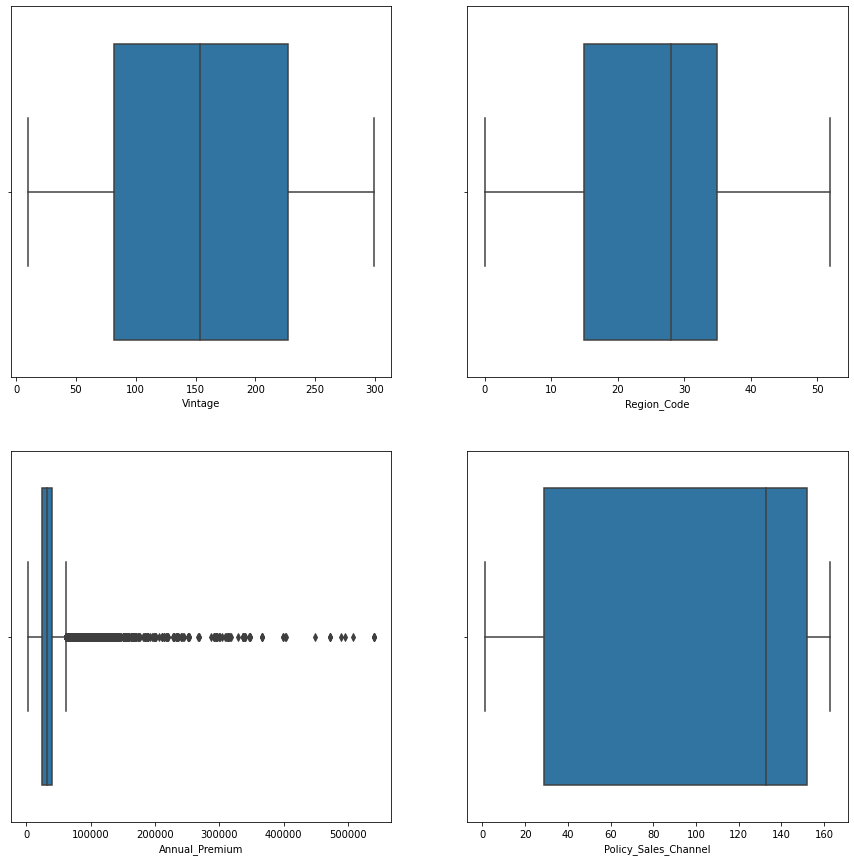

In [8]:
fig,ax=plt.subplots(2,2,figsize=(15,15))
sns.boxplot(ax=ax[0,0],x=df['Vintage'])
sns.boxplot(ax=ax[0,1],x=df['Region_Code'])
sns.boxplot(ax=ax[1,0],x=df['Annual_Premium'])
sns.boxplot(ax=ax[1,1],x=df['Policy_Sales_Channel'])



Heatmap

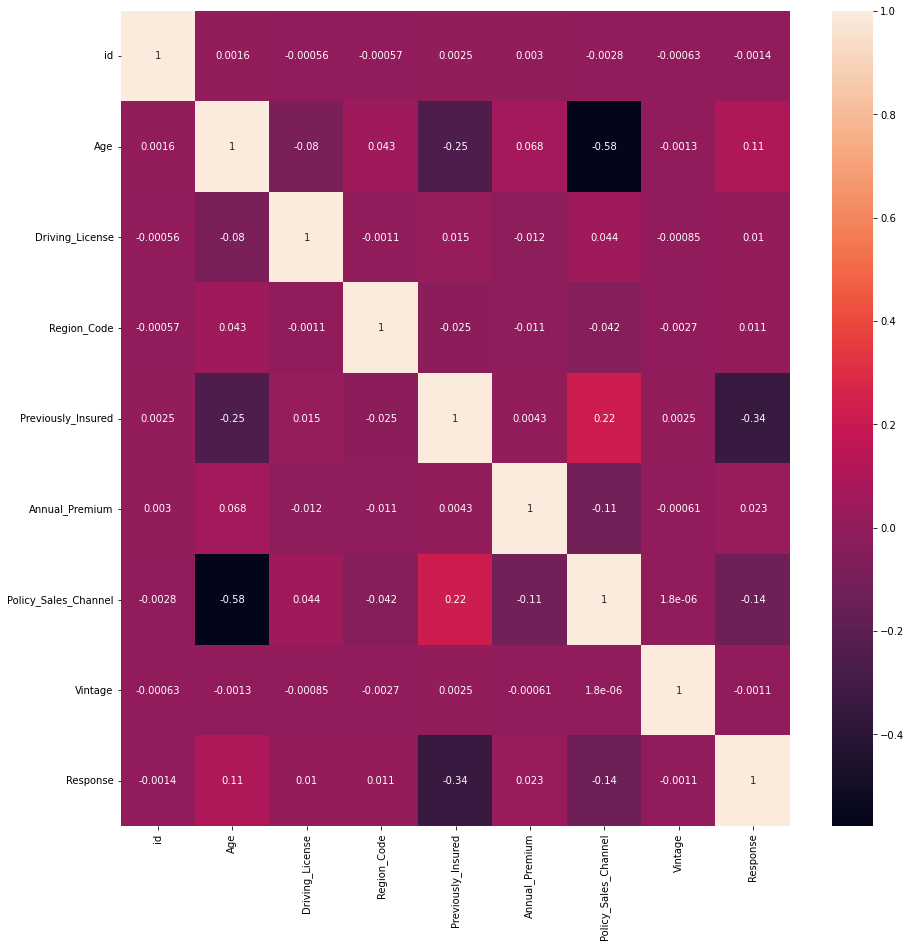

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

In [10]:
df.drop(['id'],axis=1, inplace = True)

In [11]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Preprocessing


In [12]:
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [13]:
df['Vehicle_Age']=df['Vehicle_Age' ]

In [14]:
df['Vehicle_Age'] = df['Vehicle_Age'].apply(lambda x: 3 if x == '> 2 Years' else 2 if x == '1-2 Year'
                                                                                           else 1)
df['Vehicle_Damage'] = df['Vehicle_Damage'].replace(['Yes', 'No'], [1, 0])

In [15]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,Male,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,Male,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,Male,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,Female,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [16]:
df['Gender']=df['Gender'].replace(['Male','Female'],[1,0])
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


In [17]:
min_max_scaler=preprocessing.MinMaxScaler()
x=df['Annual_Premium']
df['Annual_Premium']=min_max_scaler.fit_transform(df[['Annual_Premium']].values)
df['Age']=min_max_scaler.fit_transform(df[['Age']].values)
df['Vintage']=min_max_scaler.fit_transform(df[['Vintage']].values)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0.369231,1,28.0,0,3,1,0.070366,26.0,0.716263,1
1,1,0.861538,1,3.0,0,2,0,0.057496,26.0,0.598616,0
2,1,0.415385,1,28.0,0,3,1,0.066347,26.0,0.058824,1
3,1,0.015385,1,11.0,1,1,0,0.048348,152.0,0.667820,0
4,0,0.138462,1,41.0,1,1,0,0.046259,152.0,0.100346,0


In [18]:
x=df.drop('Response', axis = 1)
y=df['Response']

Implementation of Models

KNN

In [19]:
x_train, x_test, y_train, y_test = train_test_split(
             x, y, test_size = 0.2, random_state=42)

In [20]:
knn = KNeighborsClassifier(n_neighbors=1)

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [67]:
x_pre=knn.predict(x_test)

In [23]:
accuracy_score(y_test,x_pre)

0.8273070766970166

In [24]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(x_pre,y_test))
print('The precision of the Logistic Regression is',metrics.precision_score(x_pre,y_test,average='micro'))
print('The recall of the Logistic Regression is',metrics.recall_score(x_pre,y_test,average='weighted'))
print('The f1 of the Logistic Regression is',metrics.f1_score(x_pre,y_test,average='weighted'))

The accuracy of the Logistic Regression is 0.8273070766970166
The precision of the Logistic Regression is 0.8273070766970166
The recall of the Logistic Regression is 0.8273070766970166
The f1 of the Logistic Regression is 0.8279074097696966


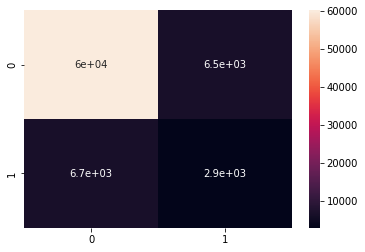

In [68]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , x_pre),annot= True)

Logistic Regression


In [25]:
l=LogisticRegression(random_state=0)

In [26]:
l.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(random_state=0)

In [69]:
x_pre=l.predict(x_test)


In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
importance = l.coef_[0]

Feature: 0, Score: 0.09039
Feature: 1, Score: -1.02753
Feature: 2, Score: -1.69214
Feature: 3, Score: -0.00018
Feature: 4, Score: -3.88702
Feature: 5, Score: 0.60161
Feature: 6, Score: 2.01996
Feature: 7, Score: -0.07664
Feature: 8, Score: -0.00273
Feature: 9, Score: 0.09924


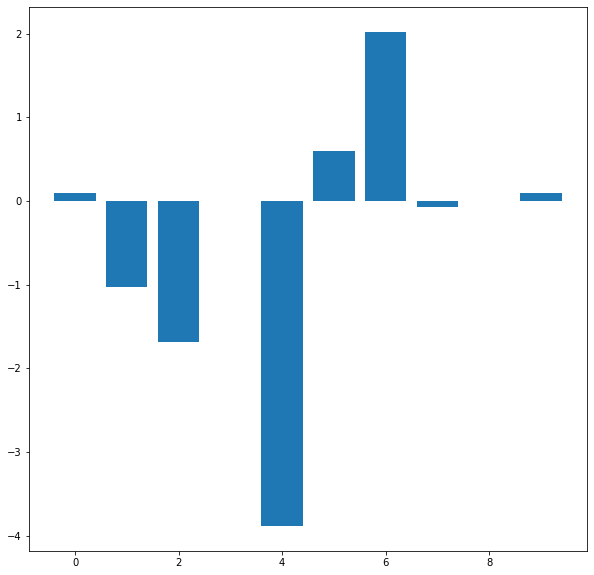

In [30]:
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [31]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(x_pre,y_test))
print('The precision of the Logistic Regression is',metrics.precision_score(x_pre,y_test,average='micro'))
print('The recall of the Logistic Regression is',metrics.recall_score(x_pre,y_test,average='weighted'))
print('The f1 of the Logistic Regression is',metrics.f1_score(x_pre,y_test,average='weighted'))

The accuracy of the Logistic Regression is 0.8740652305108761
The precision of the Logistic Regression is 0.8740652305108761
The recall of the Logistic Regression is 0.8740652305108761
The f1 of the Logistic Regression is 0.9316698862684296


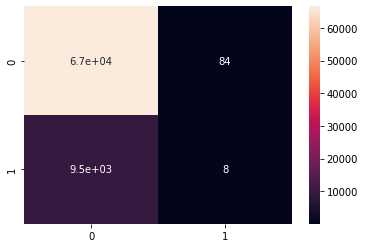

In [70]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , x_pre),annot= True)

Xgb Classifier


In [32]:
xgb_model = xgb.XGBClassifier()


In [33]:
xgb_model.fit(x_train,y_train)

XGBClassifier()

In [61]:
x_pre=xgb_model.predict(x_test)

Feature: 0, Score: 0.00346
Feature: 1, Score: 0.06951
Feature: 2, Score: 0.00622
Feature: 3, Score: 0.01714
Feature: 4, Score: 0.36105
Feature: 5, Score: 0.02056
Feature: 6, Score: 0.50138
Feature: 7, Score: 0.00376
Feature: 8, Score: 0.01545
Feature: 9, Score: 0.00148


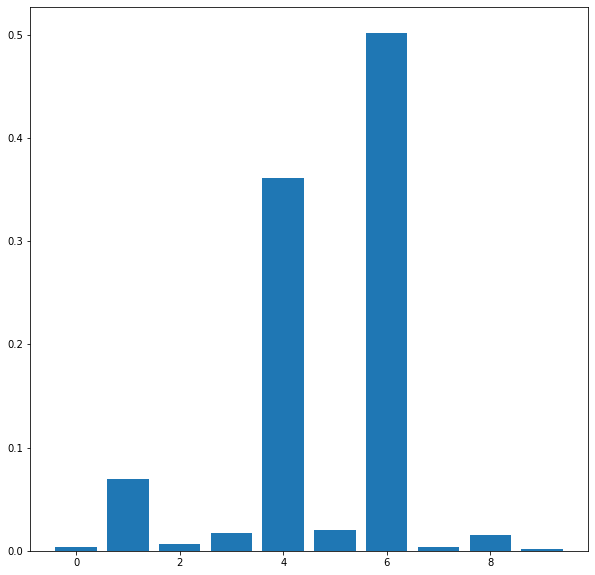

In [35]:
importance = xgb_model.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [36]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(x_pre,y_test))
print('The precision of the Logistic Regression is',metrics.precision_score(x_pre,y_test,average='micro'))
print('The recall of the Logistic Regression is',metrics.recall_score(x_pre,y_test,average='weighted'))
print('The f1 of the Logistic Regression is',metrics.f1_score(x_pre,y_test,average='weighted'))

The accuracy of the Logistic Regression is 0.8750623179659416
The precision of the Logistic Regression is 0.8750623179659416
The recall of the Logistic Regression is 0.8750623179659416
The f1 of the Logistic Regression is 0.9333687841534833


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


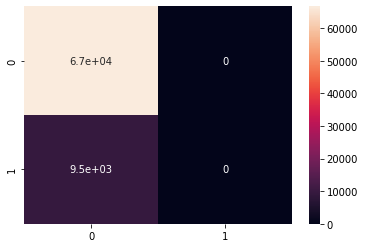

In [62]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , x_pre),annot= True)

Random forest

In [37]:
clf=RandomForestClassifier()

In [38]:
clf.fit(x_train,y_train)

RandomForestClassifier()

In [59]:
x_pre=clf.predict(x_test)

Feature: 0, Score: 0.01318
Feature: 1, Score: 0.13791
Feature: 2, Score: 0.00053
Feature: 3, Score: 0.10796
Feature: 4, Score: 0.05248
Feature: 5, Score: 0.02139
Feature: 6, Score: 0.07318
Feature: 7, Score: 0.25122
Feature: 8, Score: 0.06283
Feature: 9, Score: 0.27930


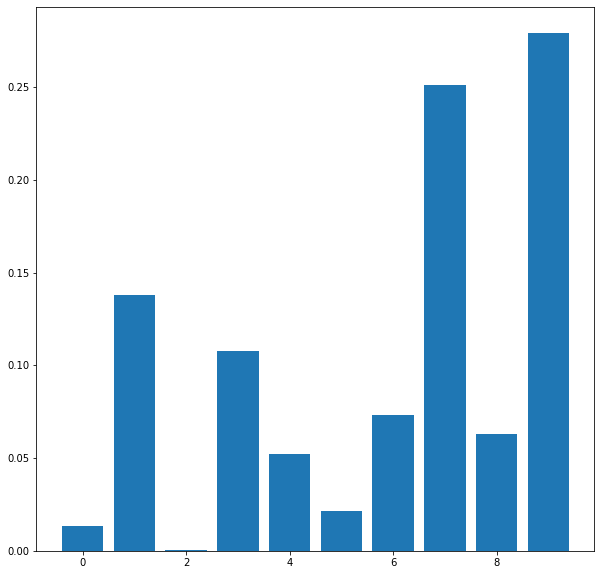

In [40]:
importance = clf.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [41]:
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(x_pre,y_test))
print('The precision of the Logistic Regression is',metrics.precision_score(x_pre,y_test,average='micro'))
print('The recall of the Logistic Regression is',metrics.recall_score(x_pre,y_test,average='weighted'))
print('The f1 of the Logistic Regression is',metrics.f1_score(x_pre,y_test,average='weighted'))

The accuracy of the Logistic Regression is 0.8657343024323686
The precision of the Logistic Regression is 0.8657343024323686
The recall of the Logistic Regression is 0.8657343024323686
The f1 of the Logistic Regression is 0.8973196431573343


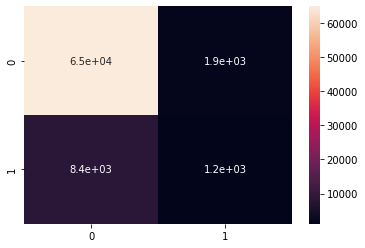

In [60]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , x_pre),annot= True)

In [42]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Tree classifer

In [44]:
clf1 = tree.DecisionTreeClassifier()

In [45]:
clf1.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
x_pre=clf1.predict(x_test)

In [47]:

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(x_pre,y_test))
print('The precision of the Logistic Regression is',metrics.precision_score(x_pre,y_test,average='micro'))
print('The recall of the Logistic Regression is',metrics.recall_score(x_pre,y_test,average='weighted'))
print('The f1 of the Logistic Regression is',metrics.f1_score(x_pre,y_test,average='weighted'))


The accuracy of the Logistic Regression is 0.8225577917136785
The precision of the Logistic Regression is 0.8225577917136785
The recall of the Logistic Regression is 0.8225577917136785
The f1 of the Logistic Regression is 0.8215478165521916


Feature: 0, Score: 0.02517
Feature: 1, Score: 0.13138
Feature: 2, Score: 0.00054
Feature: 3, Score: 0.10255
Feature: 4, Score: 0.01258
Feature: 5, Score: 0.00948
Feature: 6, Score: 0.12492
Feature: 7, Score: 0.27306
Feature: 8, Score: 0.04493
Feature: 9, Score: 0.27539


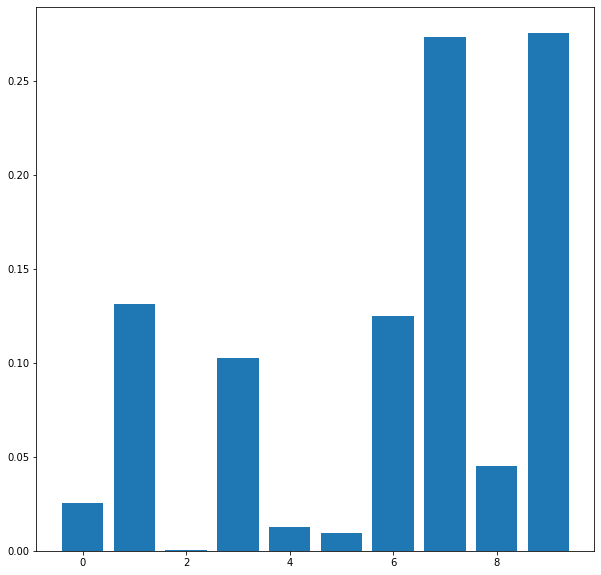

In [48]:
importance = clf1.feature_importances_
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(10,10))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

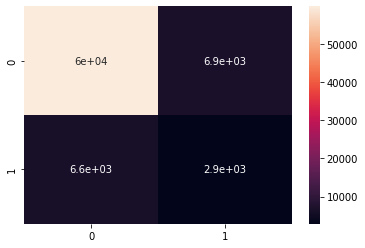

In [57]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , x_pre),annot= True)

Naive Bayes classifier


In [49]:
gnb = GaussianNB()

In [50]:
gnb.fit(x_train, y_train)

GaussianNB()

In [51]:
x_pre = gnb.predict(x_test)

In [52]:
accuracy_score(y_test,x_pre)

0.6422161580646008

In [53]:

print('The accuracy of the Logistic Regression is',metrics.accuracy_score(x_pre,y_test))
print('The precision of the Logistic Regression is',metrics.precision_score(x_pre,y_test,average='micro'))
print('The recall of the Logistic Regression is',metrics.recall_score(x_pre,y_test,average='weighted'))
print('The f1 of the Logistic Regression is',metrics.f1_score(x_pre,y_test,average='weighted'))

The accuracy of the Logistic Regression is 0.6422161580646008
The precision of the Logistic Regression is 0.6422161580646008
The recall of the Logistic Regression is 0.6422161580646008
The f1 of the Logistic Regression is 0.5826219377867093


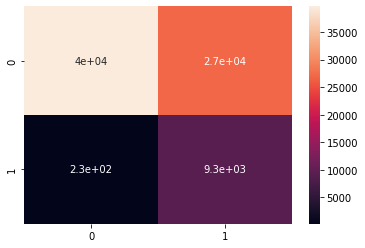

In [54]:
from sklearn.metrics import confusion_matrix
sns.heatmap(confusion_matrix(y_test , x_pre),annot= True)